## Prediction Coronary heart-disease (chd) for males in South Africa
- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low density lipoprotein cholesterol
- adiposity
- famhist: family history of heart disease 
- typea: type-A behavior
- obesity
- alcohol: current alcohol consumption
- age
- chd: yes or no(0,1)

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install ISLP

  Obtaining dependency information for ISLP from https://files.pythonhosted.org/packages/f4/d5/daa84d67cb6d29e6ce1e52eb74da029296fb1290a3b278bfa5c8ba67b7d2/ISLP-0.3.22-py3-none-any.whl.metadata
  Using cached ISLP-0.3.22-py3-none-any.whl.metadata (7.0 kB)
  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/b3/98/868d6b60a6a8847a53bca3b15b0e057fb3ed6395e5852f0c0c55bbaaa928/lifelines-0.28.0-py3-none-any.whl.metadata
  Using cached lifelines-0.28.0-py3-none-any.whl.metadata (3.2 kB)
  Obtaining dependency information for pygam from https://files.pythonhosted.org/packages/ea/a7/d7037173f7c39fd114ca7bc9757149bdfbe2951b5c2cba08038c24e55e10/pygam-0.9.1-py3-none-any.whl.metadata
  Using cached pygam-0.9.1-py3-none-any.whl.metadata (7.1 kB)
  Obtaining dependency information for pytorch-lightning from https://files.pythonhosted.org/packages/56/ed/192d7518b15a06452f480346eeebe1d1d4595af80687e142b2e6f18539fd/pytorch_lightning-2.2.1-py3-none-any.whl.metada

In [2]:
pip install ydata_profiling 

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/49/03/04ce11264d78f7a9f1025a13f8a078aa18eb2a9c628bc0a9a9c18673062c/ydata_profiling-4.7.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/e5/f3/8296f550276194a58c5500d55b19a27ae0a5a3a51ffef66710c58544b32d/pydantic-2.6.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/85.1 kB ? eta -:--:--
     ---------------------------------------- 85.1/85.1 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Obtaining dependency information for phik<0.13,>=0.11.1 from https://file

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.6.4 which is incompatible.
islp 0.3.22 requires pandas<=1.9,>=0.20, but you have pandas 2.2.1 which is incompatible.


In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP import confusion_table
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from tabulate import tabulate
import statsmodels.api as sm
from ydata_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy import stats
from sklearn.metrics import confusion_matrix

In [3]:
# Read heart-disease data
hd= pd.read_csv('heart-disease.csv')
hd

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [4]:
# Check the data types in each columns
hd.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

### Q1. Conduct an exploratory data analysis on this dataset (EDA)
#### 1.1 Change object (famhist) to 0 or 1

In [5]:
# Convert variables(famhist) to dummy variables
hd['famhist'] = hd['famhist'].map({'Absent': 0, 'Present': 1})
hd.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49    1

In [6]:
# Check for missing values
hd.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [7]:
# Summary statistics for each numerical column
hd.describe()

sbp     tobacco         ldl   adiposity     famhist       typea  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732    0.415584   53.103896   
std     20.496317    4.593024    2.070909    7.780699    0.493357    9.817534   
min    101.000000    0.000000    0.980000    6.740000    0.000000   13.000000   
25%    124.000000    0.052500    3.282500   19.775000    0.000000   47.000000   
50%    134.000000    2.000000    4.340000   26.115000    0.000000   53.000000   
75%    148.000000    5.500000    5.790000   31.227500    1.000000   60.000000   
max    218.000000   31.200000   15.330000   42.490000    1.000000   78.000000   

          obesity     alcohol         age         chd  
count  462.000000  462.000000  462.000000  462.000000  
mean    26.044113   17.044394   42.816017    0.346320  
std      4.213680   24.481059   14.608956    0.476313  
min     14.700000    0.000000   15.000000    0.000000  
25%     22.985000    0.510000   31.000000    0.000000  
50%     25.805000    7.510000   45.000000    0.000000  
75%     28.497500   23.892500   55.000000    1.000000  
max     46.580000  147.190000   64.000000    1.000000

In [10]:
# Add a constant column to the predictor variables
# Exclude the target variable 'chd' to ensures only considering the multicollinearity among the predictor variables
hd_with_const = add_constant(hd.drop(columns=['chd']))  

# Create a DataFrame to store VIF 
vif_data = pd.DataFrame()
vif_data["Feature"] = hd_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(hd_with_const.values, i) for i in range(hd_with_const.shape[1])]

# Display VIF 
print(vif_data)


     Feature         VIF
0      const  109.392687
1        sbp    1.226476
2    tobacco    1.299922
3        ldl    1.274402
4  adiposity    3.591427
5    famhist    1.081329
6      typea    1.042878
7    obesity    2.289218
8    alcohol    1.072561
9        age    2.196918


#### 1.2 Understand each features' distribution by visualization

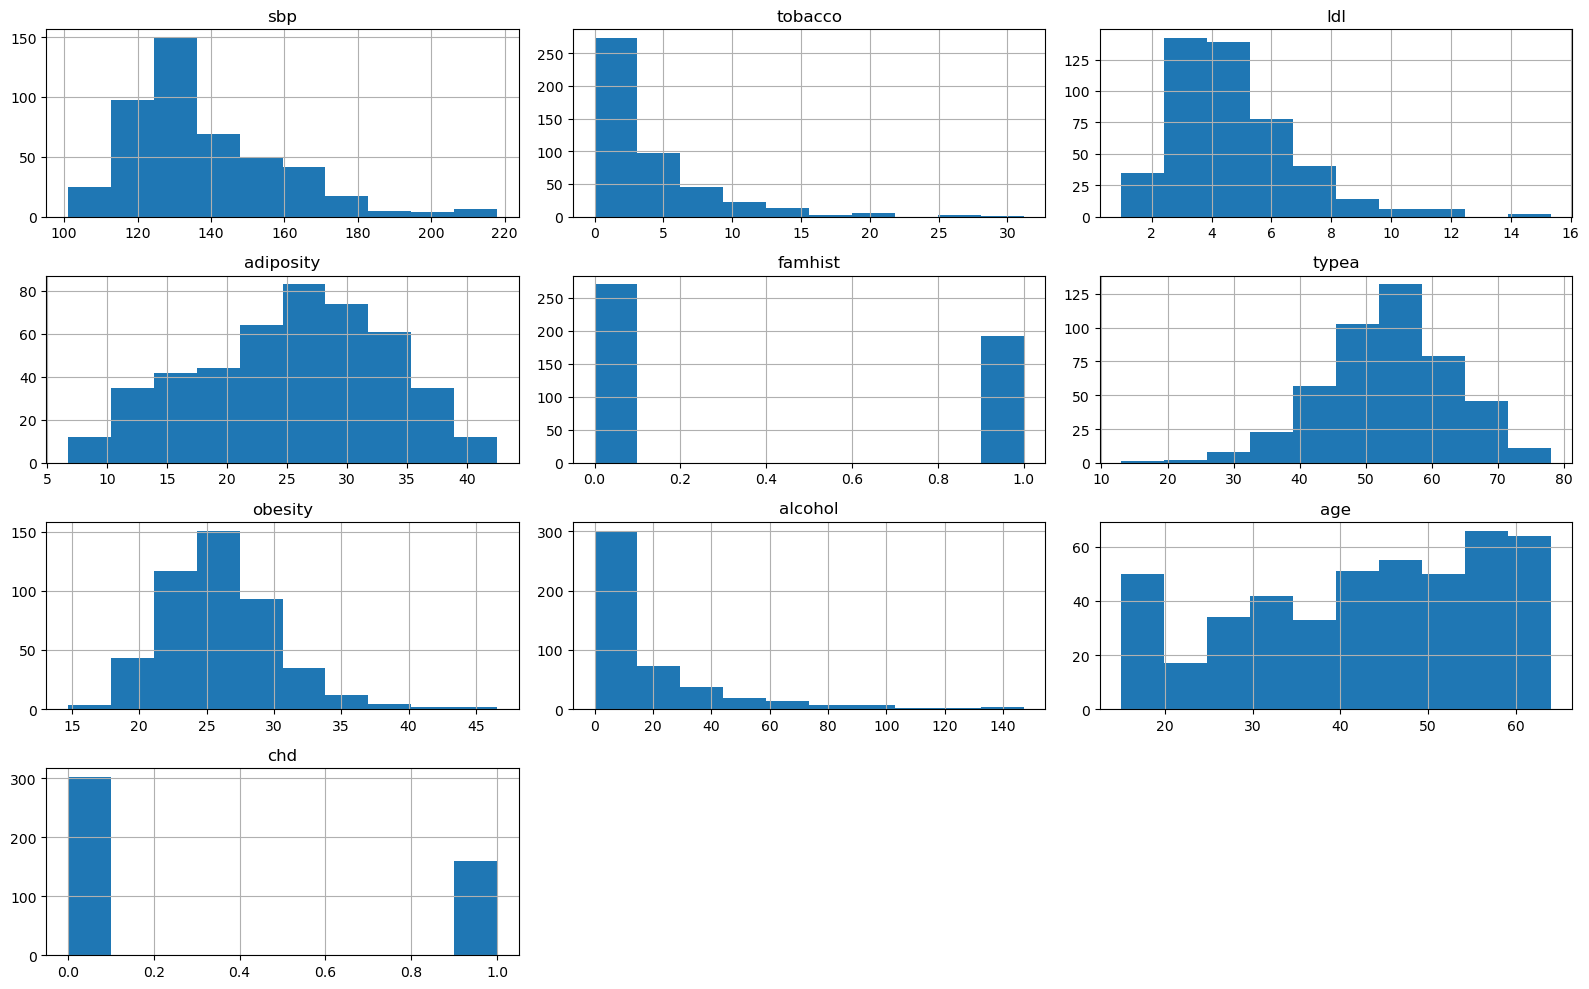

In [11]:
# Plot histograms for every features
hd.hist(figsize=(16, 10))
plt.tight_layout()
plt.grid(False)  
plt.show()

#### 1.3 Correlation matrix

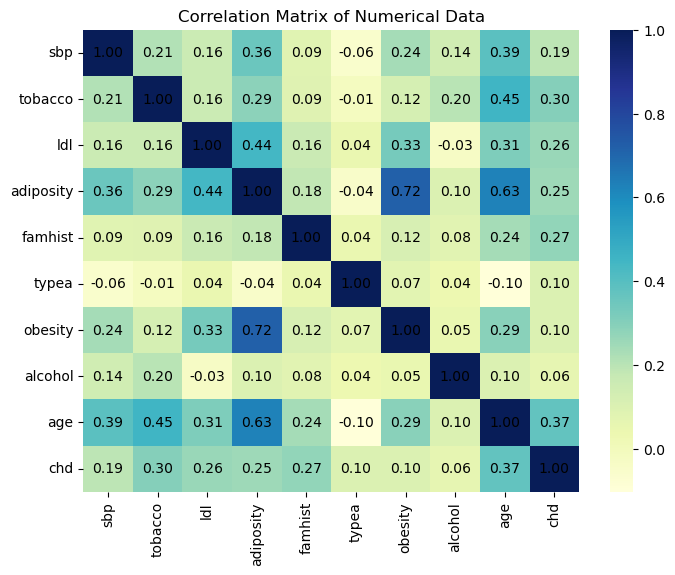

In [12]:
cor = hd.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cor, cmap='YlGnBu')

for i in range(len(cor)):
    for j in range(len(cor)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(cor.iloc[i, j]), ha='center', va='center')

plt.title('Correlation Matrix of Numerical Data')
plt.show()

#### Pairplot

c:\Users\USER\anacondanew\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anacondanew\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anacondanew\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anacondanew\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option

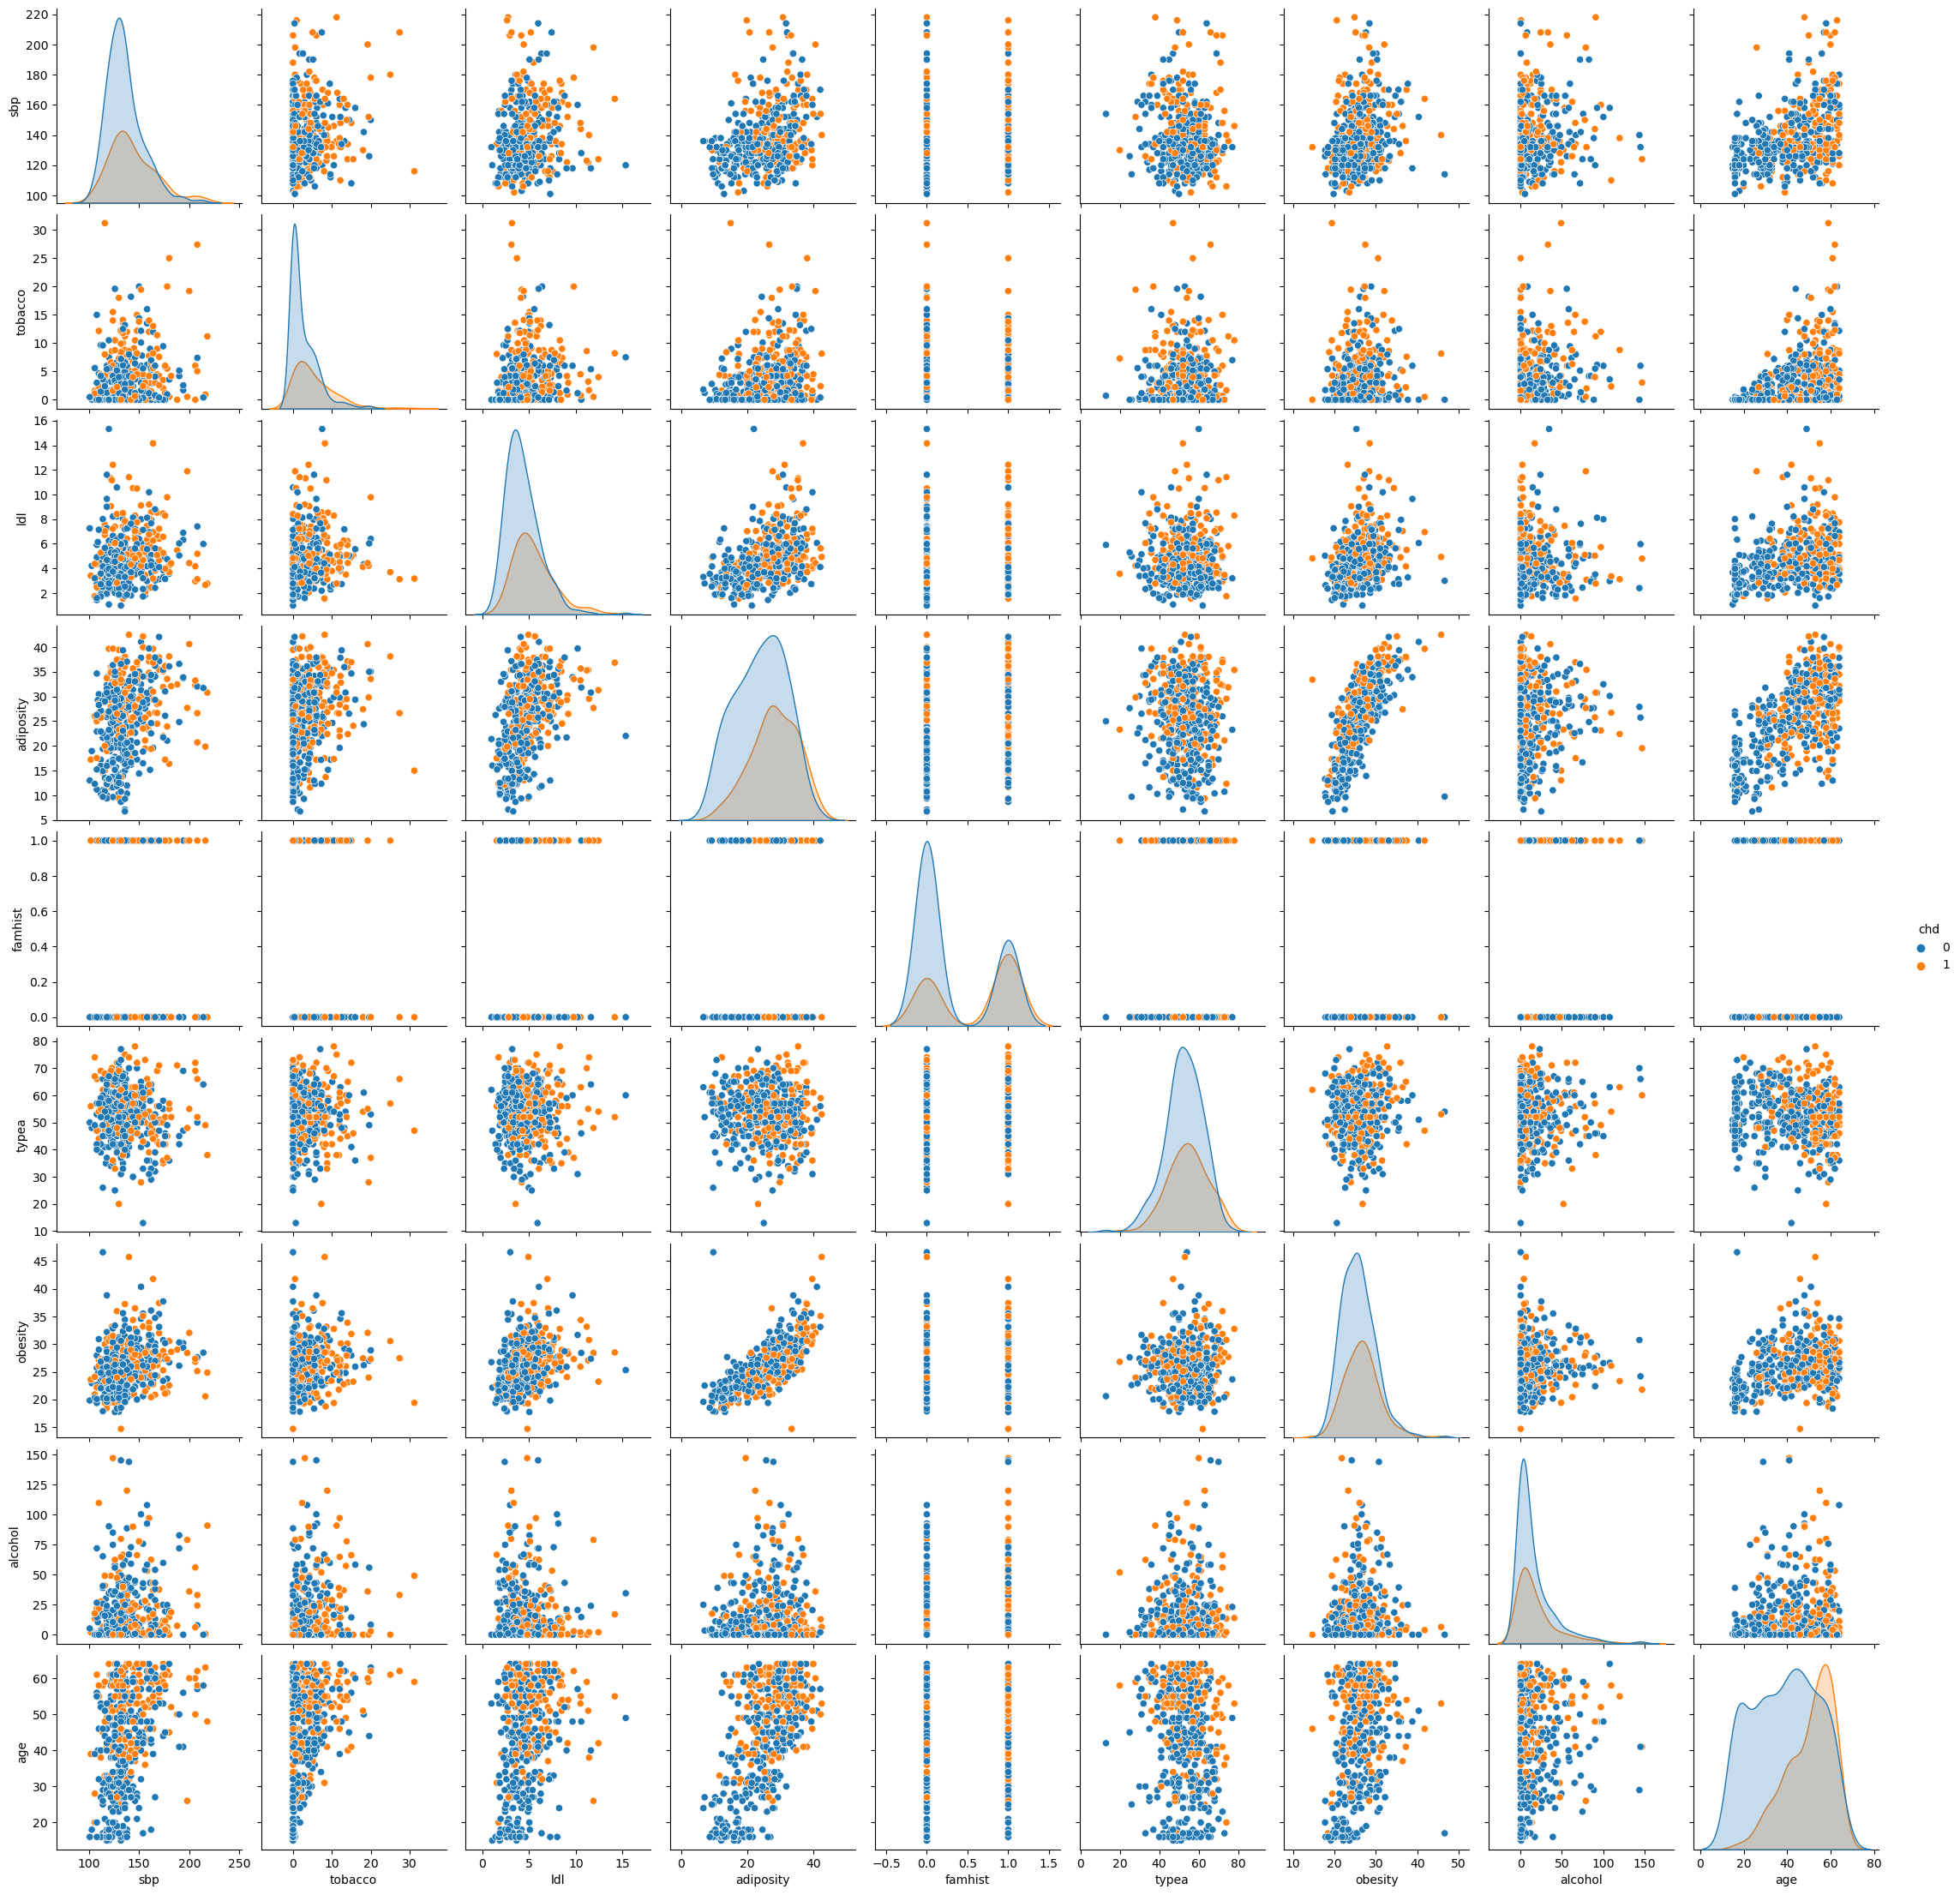

In [13]:
sns.pairplot(hd, hue='chd', diag_kind='kde')

#### Box plot

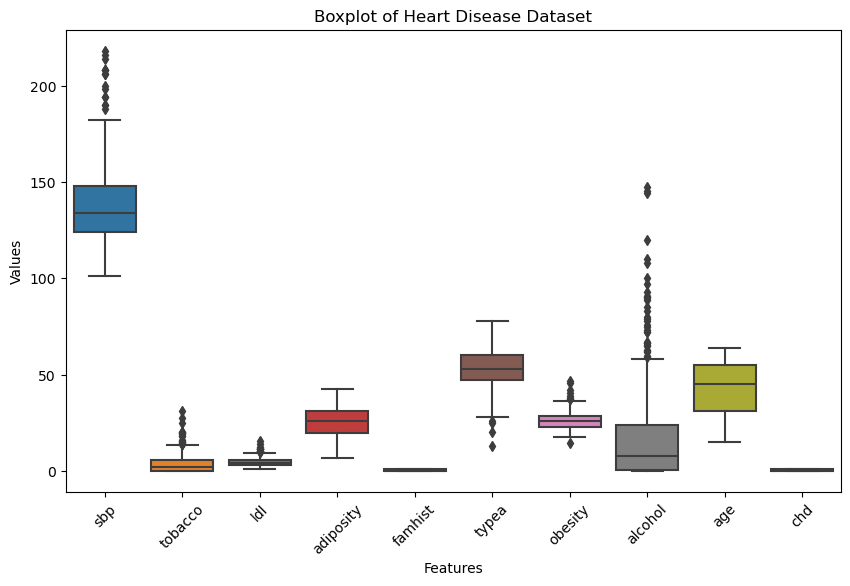

In [14]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=hd) 
plt.title('Boxplot of Heart Disease Dataset')  
plt.xlabel('Features') 
plt.ylabel('Values') 
plt.xticks(rotation=45)  
plt.show() 

#### ydata_profiling

In [18]:
profile = ProfileReport(hd, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Q2. Fit a logistic regression with ridge penalty to classify the patients and explain the results

#### 2.1 Data Preparation and Splitting

In [15]:
# Separate the features (X) and target variable (y)
X = hd.drop(columns=['chd'])
y = hd['chd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76)

# Feature scaling to maintain consistency and improves the performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print training and testing sets
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(323, 9)
(139, 9)
(323,)
(139,)


In [16]:
# Fit a logistic regression model with ridge penalty
# Setting a specific random state ensures that the results are consistent
lr_ridge = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=23)
lr_ridge.fit(X_train_scaled, y_train)

LogisticRegression(random_state=23, solver='liblinear')

#### 2.2 Model Training and Tuning
Hyperparameter Tuning with Cross-Validation Approach

In [74]:
# Define a range of values for C
Cs = np.logspace(-5, 5, 100)

# Initialize lists to store the mean accuracy for each value of C
accuracies = []

# Iterate over each value of C
for C in Cs:
    # Initialize logistic regression model with L2 penalty and current value of C
    lr_l2 = LogisticRegression(penalty='l2', C=C, solver='liblinear', random_state=20)
    
    # Perform cross-validation with 5 folds
    cv_scores = cross_val_score(lr_l2, X_train_scaled, y_train, cv=5)
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = np.mean(cv_scores)
    
    # Store the mean accuracy for this value of C
    accuracies.append(mean_accuracy)

# Find the index of the maximum accuracy
best_index = np.argmax(accuracies)

# Get the best value of C and the corresponding best accuracy
best_C = Cs[best_index]
best_accuracy = accuracies[best_index]

print(f"Best value of C: {best_C}")
print(f"Corresponding accuracy: {best_accuracy}")

# Store the accuracy
M1 = best_accuracy

Best value of C: 0.08697490026177834
Corresponding accuracy: 0.7334615384615384


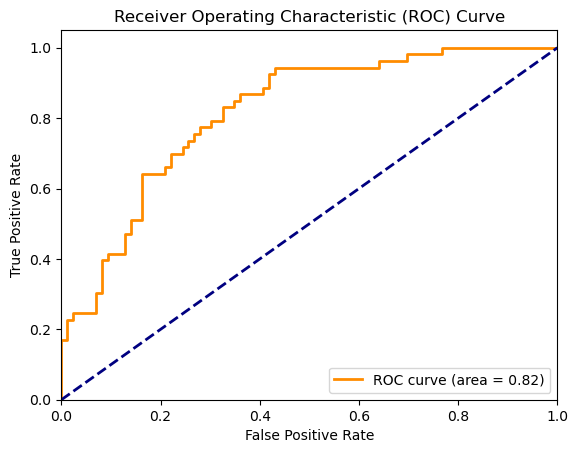

In [18]:
# Train the final model with the best hyperparameters
final_lr = LogisticRegression(penalty='l2', C=best_C, solver='liblinear', random_state=20)
final_lr.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
pred_proba_test = final_lr.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 2.3 Model Evaluation

In [23]:
# Evaluate Model Performance
# Calculate other metrics

accuracy = final_lr.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, final_lr.predict(X_test_scaled))
class_report = classification_report(y_test, final_lr.predict(X_test_scaled))

print("Accuracy:", accuracy)

Accuracy: 0.7194244604316546


In [24]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[75 11]
 [28 25]]


In [25]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79        86
           1       0.69      0.47      0.56        53

    accuracy                           0.72       139
   macro avg       0.71      0.67      0.68       139
weighted avg       0.72      0.72      0.71       139



In [36]:
def print_model_statistics(model, X_train_scaled, feature_names):
    coefficients = model.coef_[0]  # Coefficients from model
    standard_errors = np.sqrt(np.diag(np.linalg.inv(X_train_scaled.T @ X_train_scaled)))
    z_scores = coefficients / standard_errors
    p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

    # Create table data
    table_data = []
    for i, (coef, std_err, z_score, p_value) in enumerate(zip(coefficients, standard_errors, z_scores, p_values)):
        feature_name = feature_names[i]
        table_data.append([feature_name, coef, std_err, z_score, p_value])

    # Print the table
    headers = ["Feature Name", "Coefficient", "Standard Error", "Z-Score", "P-Value"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))


print_model_statistics(final_lr, X_train_scaled, X_train.columns)

+----------------+---------------+------------------+-----------+-------------+
| Feature Name   |   Coefficient |   Standard Error |   Z-Score |     P-Value |
+================+===============+==================+===========+=============+
| sbp            |     0.0518307 |        0.0624358 |  0.830144 | 0.406458    |
+----------------+---------------+------------------+-----------+-------------+
| tobacco        |     0.277717  |        0.0631638 |  4.39678  | 1.0987e-05  |
+----------------+---------------+------------------+-----------+-------------+
| ldl            |     0.296817  |        0.0622644 |  4.76704  | 1.86948e-06 |
+----------------+---------------+------------------+-----------+-------------+
| adiposity      |     0.249126  |        0.108864  |  2.28842  | 0.0221133   |
+----------------+---------------+------------------+-----------+-------------+
| famhist        |     0.358437  |        0.058116  |  6.16761  | 6.933e-10   |
+----------------+---------------+------

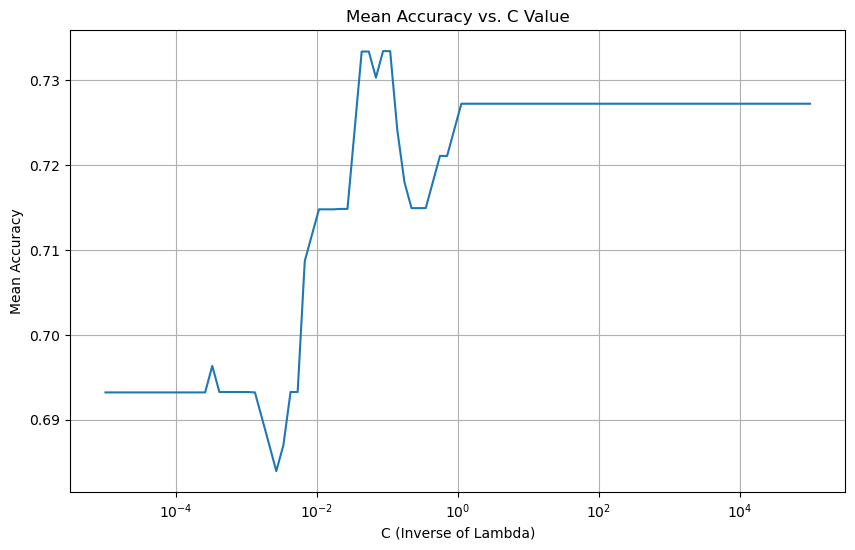

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(Cs, accuracies, linestyle='-')
plt.xscale('log')
plt.xlabel('C (Inverse of Lambda)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. C Value')
plt.grid(True)
plt.show()

### Q3. Explore other classifiers discussed in this module and find one that gives you the highest accuracy. 


### Define outliers

In [47]:
# Example code for identifying outliers (using Z-score)
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Boolean index to mark outliers
is_outlier = np.isin(np.arange(len(X_train_scaled)), outlier_indices)

### Ridge without outliers

In [49]:
# Training the model using data without outliers
X_train_no_outliers = X_train_scaled[~is_outlier]
y_train_no_outliers = y_train[~is_outlier]
lr_ridge_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Printing model statistics
print_model_statistics(lr_ridge_no_outliers, X_train_no_outliers, X_train.columns)

# Predicting the test set results
y_pred_ridge_no_outliers = lr_ridge_no_outliers.predict(X_test_scaled)

# Calculating accuracy
accuracy_ridge_no_outliers = accuracy_score(y_test, y_pred_ridge_no_outliers)
M2 = accuracy_ridge_no_outliers
print('Accuracy of Ridge Logistic Regression without outliers:', accuracy_ridge_no_outliers)

+----------------+---------------+------------------+------------+-------------+
| Feature Name   |   Coefficient |   Standard Error |    Z-Score |     P-Value |
+================+===============+==================+============+=============+
| sbp            |   -0.0784339  |        0.0761622 | -1.02983   | 0.303091    |
+----------------+---------------+------------------+------------+-------------+
| tobacco        |    0.222031   |        0.0881754 |  2.51806   | 0.0118002   |
+----------------+---------------+------------------+------------+-------------+
| ldl            |    0.448047   |        0.0789923 |  5.67203   | 1.41115e-08 |
+----------------+---------------+------------------+------------+-------------+
| adiposity      |    0.28587    |        0.127167  |  2.24799   | 0.0245768   |
+----------------+---------------+------------------+------------+-------------+
| famhist        |    0.312134   |        0.0612055 |  5.09977   | 3.4006e-07  |
+----------------+----------

### Lasso

Accuracy of Logistic Regression with L1 penalty: 0.7050359712230215
ROC AUC score of Logistic Regression with L1 penalty: 0.8084686265906099


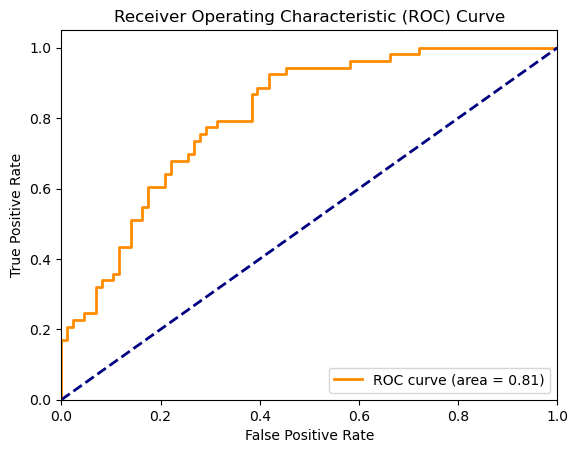

In [52]:
# Initialize logistic regression model with L1 penalty using the 'saga' solver
lr_l1 = LogisticRegression(penalty='l1', solver='saga')

# Train the model on the training data
lr_l1.fit(X_train_scaled, y_train)

# Predict the outcomes for the test set
y_pred_l1 = lr_l1.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print('Accuracy of Logistic Regression with L1 penalty:', accuracy_l1)
M3 = accuracy_l1

# Predict probabilities for class 1 (positive class)
pred_proba_l1 = lr_l1.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, pred_proba_l1)

# Calculate the area under the ROC curve (AUC)
roc_auc_l1 = auc(fpr_l1, tpr_l1)
print('ROC AUC score of Logistic Regression with L1 penalty:', roc_auc_l1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_l1, tpr_l1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_l1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Lasso without outliers

Accuracy of Logistic Regression with L1 penalty (without outliers): 0.6834532374100719


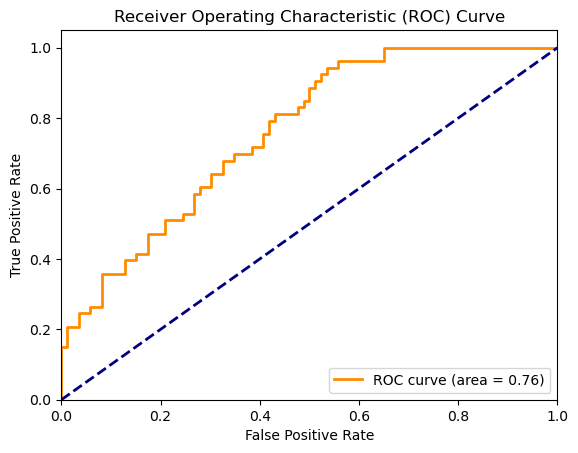

In [51]:
# Identify outliers using Z-score method
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Mark outliers using boolean index
is_outlier = np.isin(np.arange(len(X_train_scaled)), outlier_indices)

# Remove outliers
X_train_no_outliers_l1 = X_train_scaled[~is_outlier]
y_train_no_outliers_l1 = y_train[~is_outlier]

# Initialize Logistic Regression model with L1 penalty
lr_l1_no_outliers = LogisticRegression(penalty='l1', solver='saga')

# Train the model without outliers
lr_l1_no_outliers.fit(X_train_no_outliers_l1, y_train_no_outliers_l1)

# Predict the outcomes for the test set
y_pred_l1_no_outliers = lr_l1_no_outliers.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_l1_no_outliers = accuracy_score(y_test, y_pred_l1_no_outliers)
print('Accuracy of Logistic Regression with L1 penalty (without outliers):', accuracy_l1_no_outliers)
M4 = accuracy_l1_no_outliers

# Predict probabilities for class 1 (positive class)
pred_proba_l1_no_outliers = lr_l1_no_outliers.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_l1_no_outliers, tpr_l1_no_outliers, thresholds_l1_no_outliers = roc_curve(y_test, pred_proba_l1_no_outliers)

# Calculate the area under the ROC curve (AUC)
roc_auc_l1_no_outliers = auc(fpr_l1_no_outliers, tpr_l1_no_outliers)

# Plot ROC curve
plt.figure()
plt.plot(fpr_l1_no_outliers, tpr_l1_no_outliers, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_l1_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### SVM

Accuracy of SVM: 0.7266187050359713
ROC AUC score of SVM: 0.7946467749012726


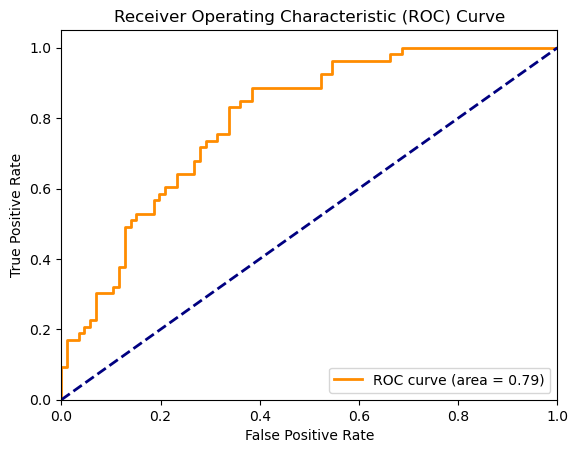

In [63]:
# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True) 

# Train the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict the outcomes for the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
M5 = accuracy_svm
print('Accuracy of SVM:', accuracy_svm)

# Predict probabilities for class 1 (positive class)
pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, pred_proba_svm)

# Calculate the area under the ROC curve (AUC)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print('ROC AUC score of SVM:', roc_auc_svm)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### SVM without outliers

Accuracy of SVM (without outliers): 0.6834532374100719


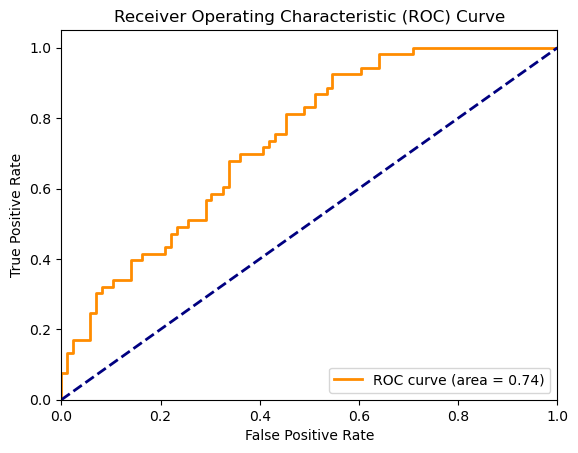

In [69]:
# Identify outliers using Z-score method
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Mark outliers using boolean index
is_outlier = np.isin(np.arange(len(X_train_scaled)), outlier_indices)

# Remove outliers
X_train_no_outliers_svm = X_train_scaled[~is_outlier]
y_train_no_outliers_svm = y_train[~is_outlier]

# Initialize SVM model
svm_model_no_outliers = SVC(kernel='linear', probability=True)

# Train the model without outliers
svm_model_no_outliers.fit(X_train_no_outliers_svm, y_train_no_outliers_svm)

# Predict the outcomes for the test set
y_pred_svm_no_outliers = svm_model_no_outliers.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_svm_no_outliers = accuracy_score(y_test, y_pred_svm_no_outliers)
print('Accuracy of SVM (without outliers):', accuracy_svm_no_outliers)
M6 = accuracy_svm_no_outliers

# Predict probabilities for class 1 (positive class)
pred_proba_svm_no_outliers = svm_model_no_outliers.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_svm_no_outliers, tpr_svm_no_outliers, thresholds_svm_no_outliers = roc_curve(y_test, pred_proba_svm_no_outliers)

# Calculate the area under the ROC curve (AUC)
roc_auc_svm_no_outliers = auc(fpr_svm_no_outliers, tpr_svm_no_outliers)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm_no_outliers, tpr_svm_no_outliers, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Random forest

Accuracy of Random Forest: 0.6474820143884892
ROC AUC score of Random Forest: 0.7604212373848179


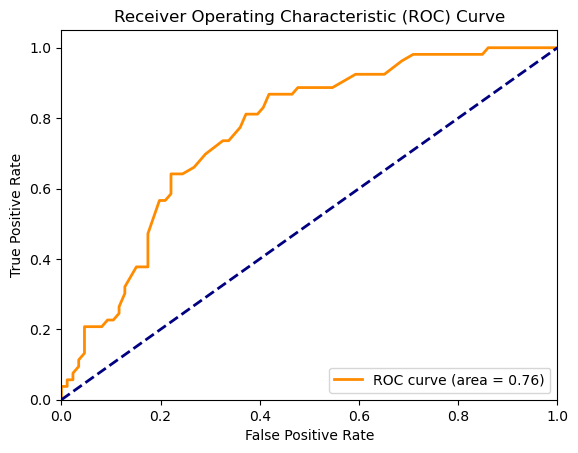

In [58]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict the outcomes for the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
M7 = accuracy_rf
print('Accuracy of Random Forest:', accuracy_rf)

# Predict probabilities for class 1 (positive class)
pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, pred_proba_rf)

# Calculate the area under the ROC curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print('ROC AUC score of Random Forest:', roc_auc_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Random forest without outliers

Accuracy of Random Forest (without outliers): 0.6618705035971223


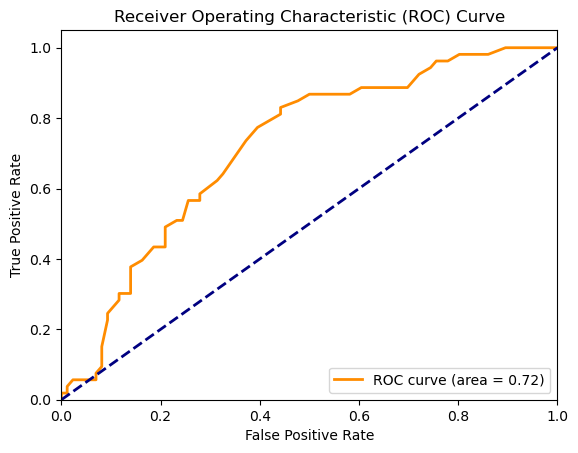

In [70]:
# Identify outliers using Z-score method
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Mark outliers using boolean index
is_outlier = np.isin(np.arange(len(X_train_scaled)), outlier_indices)

# Remove outliers
X_train_no_outliers_rf = X_train_scaled[~is_outlier]
y_train_no_outliers_rf = y_train[~is_outlier]

# Initialize Random Forest model
rf_model_no_outliers = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model without outliers
rf_model_no_outliers.fit(X_train_no_outliers_rf, y_train_no_outliers_rf)

# Predict the outcomes for the test set
y_pred_rf_no_outliers = rf_model_no_outliers.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_rf_no_outliers = accuracy_score(y_test, y_pred_rf_no_outliers)
print('Accuracy of Random Forest (without outliers):', accuracy_rf_no_outliers)
M8 = accuracy_rf_no_outliers

# Predict probabilities for class 1 (positive class)
pred_proba_rf_no_outliers = rf_model_no_outliers.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_rf_no_outliers, tpr_rf_no_outliers, thresholds_rf_no_outliers = roc_curve(y_test, pred_proba_rf_no_outliers)

# Calculate the area under the ROC curve (AUC)
roc_auc_rf_no_outliers = auc(fpr_rf_no_outliers, tpr_rf_no_outliers)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf_no_outliers, tpr_rf_no_outliers, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Decision tree

Accuracy of Decision Tree: 0.5971223021582733
ROC AUC score of Decision Tree: 0.573058358929355


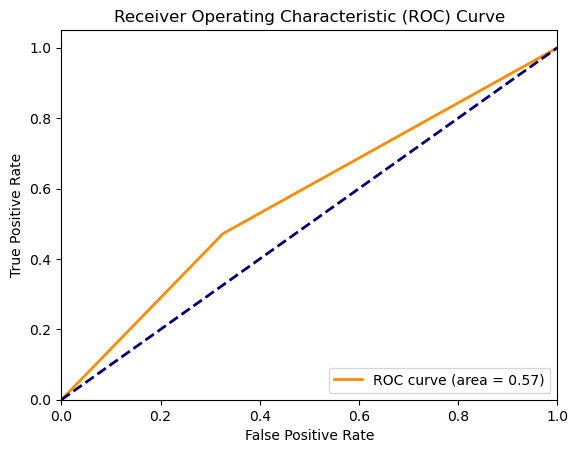

In [56]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=250)

# Train the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Predict the outcomes for the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
M9 = accuracy_dt
print('Accuracy of Decision Tree:', accuracy_dt)

# Predict probabilities for class 1 (positive class)
pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_proba_dt)

# Calculate the area under the ROC curve (AUC)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print('ROC AUC score of Decision Tree:', roc_auc_dt)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Decision tree without ourliers

Accuracy of Decision Tree (without outliers): 0.6187050359712231


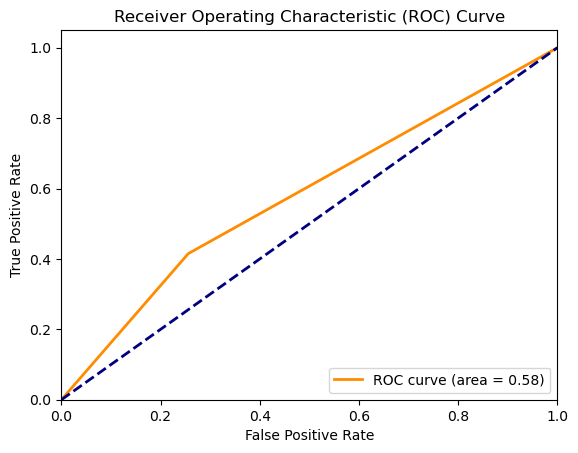

In [71]:
# Identify outliers using Z-score method
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Mark outliers using boolean index
is_outlier = np.isin(np.arange(len(X_train_scaled)), outlier_indices)

# Remove outliers
X_train_no_outliers_dt = X_train_scaled[~is_outlier]
y_train_no_outliers_dt = y_train[~is_outlier]

# Initialize Decision Tree model
dt_model_no_outliers = DecisionTreeClassifier(random_state=250)

# Train the model without outliers
dt_model_no_outliers.fit(X_train_no_outliers_dt, y_train_no_outliers_dt)

# Predict the outcomes for the test set
y_pred_dt_no_outliers = dt_model_no_outliers.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_dt_no_outliers = accuracy_score(y_test, y_pred_dt_no_outliers)
print('Accuracy of Decision Tree (without outliers):', accuracy_dt_no_outliers)
M10 = accuracy_dt_no_outliers

# Predict probabilities for class 1 (positive class)
pred_proba_dt_no_outliers = dt_model_no_outliers.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_dt_no_outliers, tpr_dt_no_outliers, thresholds_dt_no_outliers = roc_curve(y_test, pred_proba_dt_no_outliers)

# Calculate the area under the ROC curve (AUC)
roc_auc_dt_no_outliers = auc(fpr_dt_no_outliers, tpr_dt_no_outliers)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dt_no_outliers, tpr_dt_no_outliers, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### kNN

Accuracy of KNN: 0.6546762589928058
ROC AUC score of KNN: 0.7258666081614743


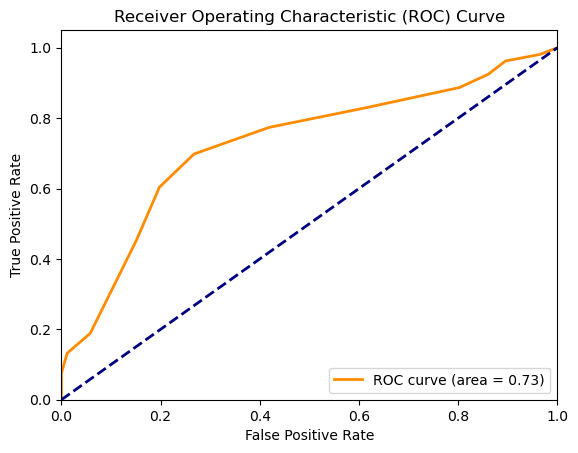

In [57]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=20)

# Train the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Predict the outcomes for the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
M11 = accuracy_knn
print('Accuracy of KNN:', accuracy_knn)

# Predict probabilities for class 1 (positive class)
pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pred_proba_knn)

# Calculate the area under the ROC curve (AUC)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print('ROC AUC score of KNN:', roc_auc_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### kNN without outliers

Accuracy of KNN (without outliers): 0.6474820143884892


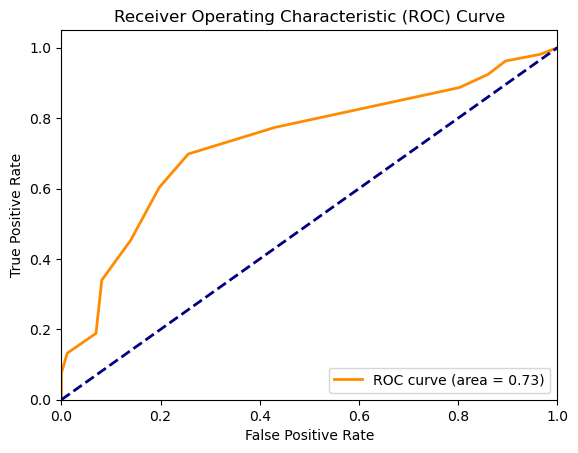

In [79]:
# Identify outliers using Z-score method
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Mark outliers using boolean index
is_outlier = np.isin(np.arange(len(X_train_scaled)), outlier_indices)

# Remove outliers
X_train_no_outliers_knn = X_train_scaled[~is_outlier]
y_train_no_outliers_knn = y_train[~is_outlier]

# Initialize KNN model
knn_model_no_outliers = KNeighborsClassifier(n_neighbors=20)

# Train the model without outliers
knn_model_no_outliers.fit(X_train_no_outliers_knn, y_train_no_outliers_knn)

# Predict the outcomes for the test set
y_pred_knn_no_outliers = knn_model_no_outliers.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_knn_no_outliers = accuracy_score(y_test, y_pred_knn_no_outliers)
print('Accuracy of KNN (without outliers):', accuracy_knn_no_outliers)
M12 = accuracy_knn_no_outliers

# Predict probabilities for class 1 (positive class)
pred_proba_knn_no_outliers = knn_model_no_outliers.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_knn_no_outliers, tpr_knn_no_outliers, thresholds_knn_no_outliers = roc_curve(y_test, pred_proba_knn_no_outliers)

# Calculate the area under the ROC curve (AUC)
roc_auc_knn_no_outliers = auc(fpr_knn_no_outliers, tpr_knn_no_outliers)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn_no_outliers, tpr_knn_no_outliers, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [77]:
# Define model names
model_names = {
    "M1": "Ridge",
    "M2": "Ridge without outliers",
    "M3": "Lasso",
    "M4": "Lasso without outliers",
    "M5": "SVM",
    "M6": "SVM without outliers",
    "M7": "Random forest",
    "M8": "Random forest without outliers",
    "M9": "Decision tree",
    "M10": "Decision tree without outliers",
    "M11": "kNN",
    "M12": "kNN without outliers"
}

# Gather all accuracies
accuracies = {
    "M1": M1,
    "M2": M2,
    "M3": M3,
    "M4": M4,
    "M5": M5,
    "M6": M6,
    "M7": M7,
    "M8": M8,
    "M9": M9,
    "M10": M10,
    "M11": M11,
    "M12": M12
}

# Print all accuracies 
for key, accuracy in accuracies.items():
    print(f'{model_names[key]:<30}: {accuracy}')

Ridge                         : 0.7334615384615384
Ridge without outliers        : 0.7050359712230215
Lasso                         : 0.7050359712230215
Lasso without outliers        : 0.6834532374100719
SVM                           : 0.7266187050359713
SVM without outliers          : 0.6834532374100719
Random forest                 : 0.6474820143884892
Random forest without outliers: 0.6618705035971223
Decision tree                 : 0.5971223021582733
Decision tree without outliers: 0.6187050359712231
kNN                           : 0.6546762589928058
kNN without outliers          : 0.6474820143884892
